In [2]:
import pymc3 as pm

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')

In [5]:
df = pd.read_csv('./df.csv')

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (7,9,10,11,12,13,16,17,20,21,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df.tail(2)

zone_id        date  total_demand  t4w_total_demand  \
697709      178  2021-05-02   1581.899542     149451.792862   
697710      603  2021-05-02    359.100738      37315.282715   

        t4w_median_demand_same_dow  t4w_median_demand_same_dow_v2  \
697709                 1681.217186                    1681.217186   
697710                  374.762541                     374.762541   

        t7d_median_total_demand holiday_name  t7d_orders custom_holiday_name  \
697709              1238.645334          NaN        9945                 NaN   
697710               325.978169          NaN        2184                 NaN   

        ... total_demand_lag21 total_demand_lag-21 total_demand_new  year  \
697709  ...        2055.804675                 NaN      1581.899542  2021   
697710  ...         383.950529                 NaN       359.100738  2021   

        natl_holiday_factor  zone_level_holiday_factor error abs_error  \
697709                  NaN                        1.0   NaN       NaN   
697710                  NaN                        1.0   NaN       NaN   

        pct_error  abs_pct_error  
697709        NaN            NaN  
697710        NaN            NaN  

[2 rows x 36 columns]

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='zone_level_holiday_factor', ylabel='Density'>

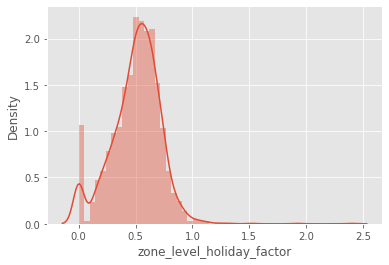

In [15]:
sns.distplot(df.loc[df.holiday_name == 'Easter'].zone_level_holiday_factor)

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='zone_level_holiday_factor', ylabel='Density'>

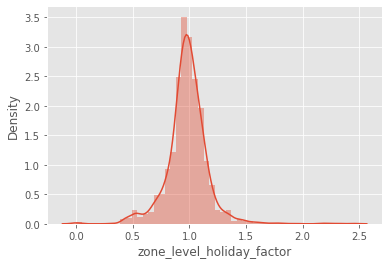

In [160]:
sns.distplot(df.loc[df.holiday_name == 'Super Bowl'].zone_level_holiday_factor)

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='zone_level_holiday_factor', ylabel='Density'>

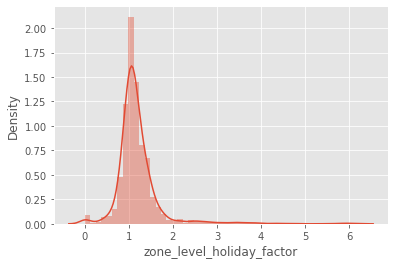

In [209]:
sns.distplot(df.loc[df.holiday_name == 'Labor Day'].zone_level_holiday_factor)

In [210]:
df.loc[df.holiday_name == 'Labor Day'].zone_level_holiday_factor.describe()

count    1621.000000
mean        1.189858
std         0.525896
min         0.000000
25%         0.978657
50%         1.101205
75%         1.282158
max         6.179212
Name: zone_level_holiday_factor, dtype: float64

In [20]:
df.loc[df.holiday_name == 'Easter'].zone_level_holiday_factor.std()**2

0.047023290452113016

In [176]:
df.loc[df.holiday_name == 'Super Bowl'].zone_level_holiday_factor.std()**2

0.03326910706483026

In [275]:
df.loc[df.holiday_name == 'Thanksgiving_lag2'].zone_level_holiday_factor.std()**2

0.07880595045827617

In [274]:
df.loc[df.holiday_name == 'Super Bowl'][['year', 'natl_holiday_factor']].drop_duplicates()

year  natl_holiday_factor
116367  2018                  NaN
295091  2019             0.963613
473815  2020             0.947876
655976  2021             0.947876

In [250]:
df.loc[df.holiday_name == "New Year's Day"].zone_level_holiday_factor.std()**2

0.25433972018405654

In [245]:
df['is_lag_holiday'] = df.holiday_name.str.contains('lag')
df.is_lag_holiday.fillna(False, inplace=True)

high_variance_holidays = df.loc[
    (~df.holiday_name.isna())
    & (~df.is_lag_holiday)
].groupby('holiday_name').zone_level_holiday_factor.std().reset_index(name='std_dev')

In [249]:
high_variance_holidays.sort_values('std_dev').tail(10)

holiday_name     std_dev
0              Boxing Day    0.432578
2         CA Thanksgiving    0.439288
9              Family Day    0.491249
15             Labour Day    0.501006
19         New Year's Day    0.504321
25           Victoria Day    0.522523
14              Labor Day    0.525896
4   Canada Day (Observed)    0.553702
11            Good Friday    1.161028
26  Washington's Birthday  254.079425

In [93]:
df.year.unique()

array([2017, 2018, 2019, 2020, 2021])

In [31]:
within_zone_variation = df.loc[df.holiday_name == 'Easter'].groupby('zone_id').zone_level_holiday_factor.std().reset_index(name='std_dev')
within_zone_variation['var'] = within_zone_variation.std_dev ** 2

within_zone_variation.head(2)

zone_id   std_dev       var
0        1  0.042424  0.001800
1       13  0.130083  0.016922

In [39]:
within_zone_variation['var'].describe()

count    491.000000
mean       0.030534
std        0.043638
min        0.000138
25%        0.007971
50%        0.018391
75%        0.039200
max        0.609864
Name: var, dtype: float64

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='var', ylabel='Density'>

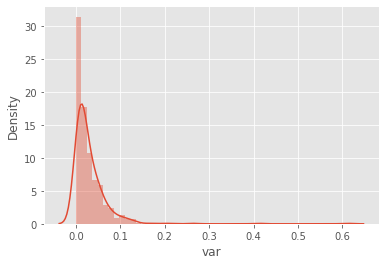

In [34]:
sns.distplot(within_zone_variation['var'])

In [163]:
within_zone_variation = df.loc[df.holiday_name == 'Super Bowl'].groupby('zone_id').zone_level_holiday_factor.std().reset_index(name='std_dev')
within_zone_variation['var'] = within_zone_variation.std_dev ** 2

within_zone_variation.head(2)

zone_id   std_dev       var
0        1  0.034821  0.001213
1       13  0.148293  0.021991

In [164]:
within_zone_variation['var'].describe()

count    491.000000
mean       0.032314
std        0.058918
min        0.000129
25%        0.005333
50%        0.014232
75%        0.035668
max        0.733048
Name: var, dtype: float64

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='var', ylabel='Density'>

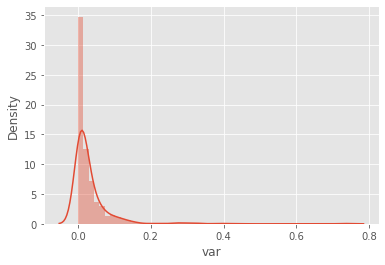

In [165]:
sns.distplot(within_zone_variation['var'])

In [24]:
import scipy.stats as st

In [161]:
s = st.norm

In [ ]:
s.pdf

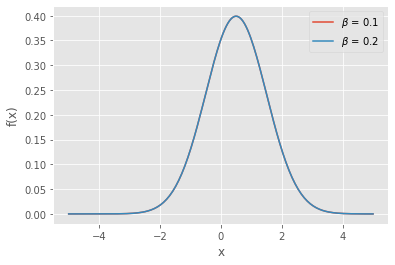

In [167]:
x = np.linspace(-5, 5, 200)
# for b in [0.25, 0.5, 1.0, 2.0]:
for b in [0.1, 0.2]:
    pdf = st.norm.pdf(x, loc=0.5, scale=1)
    plt.plot(x, pdf, label=r'$\beta$ = {}'.format(b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

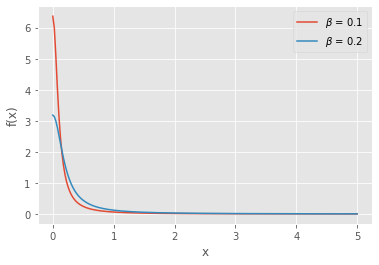

In [37]:
x = np.linspace(0, 5, 200)
# for b in [0.25, 0.5, 1.0, 2.0]:
for b in [0.1, 0.2]:
    pdf = st.halfcauchy.pdf(x, scale=b)
    plt.plot(x, pdf, label=r'$\beta$ = {}'.format(b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

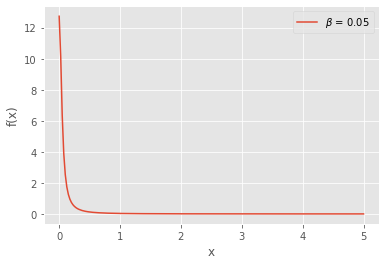

In [41]:
x = np.linspace(0, 5, 200)
# for b in [0.25, 0.5, 1.0, 2.0]:
for b in [0.05]:
    pdf = st.halfcauchy.pdf(x, scale=b)
    plt.plot(x, pdf, label=r'$\beta$ = {}'.format(b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

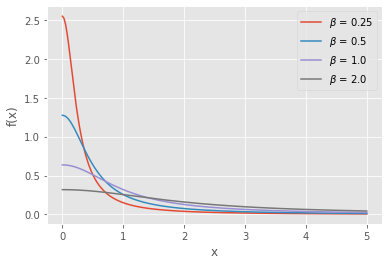

In [38]:
x = np.linspace(0, 5, 200)
for b in [0.25, 0.5, 1.0, 2.0]:
# for b in [0.1, 0.2]:
    pdf = st.halfcauchy.pdf(x, scale=b)
    plt.plot(x, pdf, label=r'$\beta$ = {}'.format(b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

In [290]:
dd = df.loc[
#     (df.holiday_name == 'Easter') & (df.year < 2021)
#     (df.holiday_name == 'Super Bowl') & (df.year < 2021)
#     (df.holiday_name == 'Labor Day') & (df.year < 2020)
#     (df.holiday_name == "New Year's Day") & (df.year < 2021)
    (df.holiday_name == 'Thanksgiving_lag2') & (df.year < 2020)
           ]

# [] maybe exclude 2020

zone_list = dd.zone_id.unique()
dd['zone_idx'] = dd.zone_id.apply(lambda x: np.where(zone_list == x)[0][0])

# does this need to be mapped to [0,len(dd.zone_id.unique())-1] ? seems yes
zone_idx = dd.zone_idx.values

<ipython-input-290-e39d339703a0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['zone_idx'] = dd.zone_id.apply(lambda x: np.where(zone_list == x)[0][0])


In [291]:
dd.shape

(1356, 38)

In [292]:
dd.loc[dd.zone_id == 1]

zone_id        date  total_demand  t4w_total_demand  \
81510         1  2017-11-25   1702.742905     226041.120144   
260283        1  2018-11-24   1753.389348     266060.951081   
442432        1  2019-11-30   2009.490579     248841.447850   

        t4w_median_demand_same_dow  t4w_median_demand_same_dow_v2  \
81510                  1981.703931                    1981.703931   
260283                 2181.031313                    2181.031313   
442432                 2035.175732                    2035.175732   

        t7d_median_total_demand       holiday_name  t7d_orders  \
81510               2007.925724  Thanksgiving_lag2       25132   
260283              2290.159473  Thanksgiving_lag2       25132   
442432              2152.915354  Thanksgiving_lag2       25132   

       custom_holiday_name  ... total_demand_new  year natl_holiday_factor  \
81510                  NaN  ...      2043.758660  2017                 NaN   
260283                 NaN  ...      2358.267122  2018                 NaN   
442432                 NaN  ...      2147.608609  2019            0.831549   

       zone_level_holiday_factor     error  abs_error pct_error abs_pct_error  \
81510                   0.833143       NaN        NaN       NaN           NaN   
260283                  0.743508       NaN        NaN       NaN           NaN   
442432                  0.935688 -0.104139   0.104139 -5.379927      5.379927   

        is_lag_holiday  zone_idx  
81510             True         4  
260283            True         4  
442432            True         4  

[3 rows x 38 columns]

In [101]:
with pm.Model() as hierarchical_model:
#     mu_mu = pm.Normal('mu_mu', mu=0.5, sigma=0.05)
    mu_mu = pm.Normal('mu_mu', mu=0.5, sigma=1)
    sigma_mu = pm.HalfCauchy('sigma_mu', beta=0.5)
    
#     mu_sigma = pm.HalfCauchy('mu_sigma', beta=0.1)
#     sigma_sigma = pm.HalfCauchy('sigma_sigma', beta=0.05)
    
    # mean for each zone, normally distributed aroung group mean mu_mu
    mu = pm.Normal('mu', mu=mu_mu, sigma=sigma_mu, shape=len(dd.zone_id.unique()))
    # variation/sigma for each zone, HalfCauchy-distributed (avg within-zone variation) 
    sigma = pm.HalfCauchy('sigma', beta=0.1, shape=len(dd.zone_id.unique()))
    
    # error
    
    # expected value
    
    # data likelihood
    # draw from zone dist
    
    y_like = pm.Normal('y_like', mu=mu[zone_idx], sigma=sigma[zone_idx], observed=dd.zone_level_holiday_factor)
    

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pymc3/model.py:1755: ImputationWarning: Data in y_like contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


In [293]:
with pm.Model() as hierarchical_model:
    # can make mu the nat'l avg for the zone
    mu_mu = pm.Normal('mu_mu', mu=dd.natl_holiday_factor.mean(), sigma=1)
    sigma_mu = pm.HalfCauchy('sigma_mu', beta=0.5)
    
#     mu_sigma = pm.HalfCauchy('mu_sigma', beta=0.1)
#     sigma_sigma = pm.HalfCauchy('sigma_sigma', beta=0.05)
    
    # mean for each zone, normally distributed aroung group mean mu_mu
    mu = pm.Normal('mu', mu=mu_mu, sigma=sigma_mu, shape=len(dd.zone_id.unique()))
    # variation/sigma for each zone, HalfCauchy-distributed (avg within-zone variation) 
    sigma = pm.HalfCauchy('sigma', beta=0.1, shape=len(dd.zone_id.unique()))
    
    # error
    
    # expected value
    
    # data likelihood
    # draw from zone dist
    
    y_like = pm.Normal('y_like', mu=mu[zone_idx], sigma=sigma[zone_idx], observed=dd.zone_level_holiday_factor)
    

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pymc3/model.py:1755: ImputationWarning: Data in y_like contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


In [294]:
with hierarchical_model:
    hierarchical_trace = pm.sample()

<ipython-input-294-febab759f480>:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  hierarchical_trace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_like_missing, sigma, mu, sigma_mu, mu_mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
There were 196 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7111761546110219, but should be close to 0.8. Try to increase the number of tuning steps.
There were 273 divergences after tuning. Increase `target_accept` or reparameterize.
There were 599 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.44158115906573125, but should be close to 0.8. Try to increase the number of tuning steps.
There were 224 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7126701762619807, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during s

<ipython-input-103-bea842d6d01d>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(hierarchical_trace)
/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'mu_mu'}>,
        <AxesSubplot:title={'center':'mu_mu'}>],
       [<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'y_like_missing'}>,
        <AxesSubplot:title={'center':'y_like_missing'}>],
       [<AxesSubplot:title={'center':'sigma_mu'}>,
        <AxesSubplot:title={'center':'sigma_mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

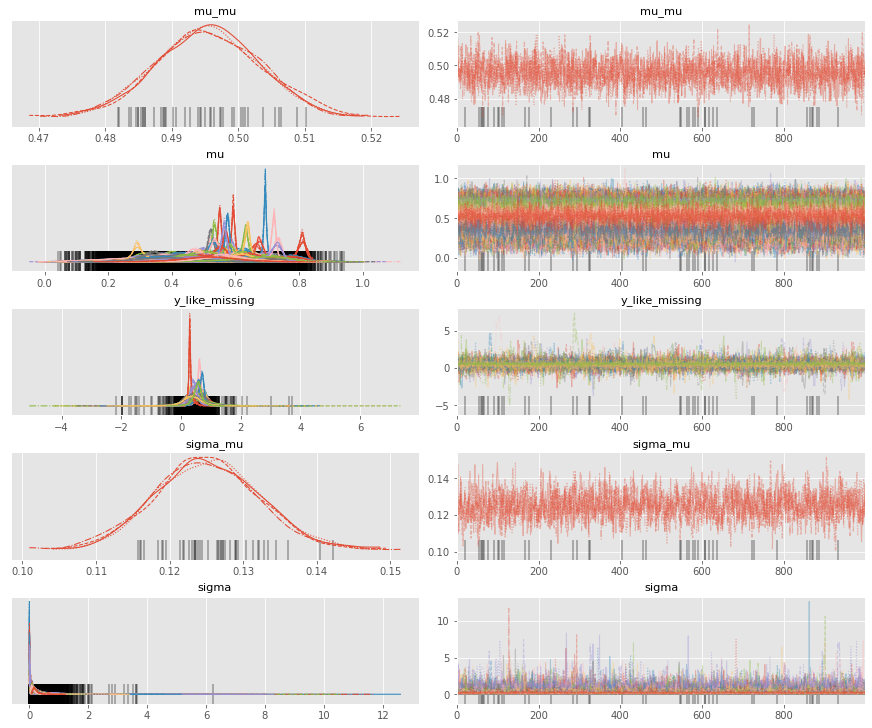

In [103]:
pm.traceplot(hierarchical_trace)

<ipython-input-175-bea842d6d01d>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(hierarchical_trace)
/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'mu_mu'}>,
        <AxesSubplot:title={'center':'mu_mu'}>],
       [<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'y_like_missing'}>,
        <AxesSubplot:title={'center':'y_like_missing'}>],
       [<AxesSubplot:title={'center':'sigma_mu'}>,
        <AxesSubplot:title={'center':'sigma_mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

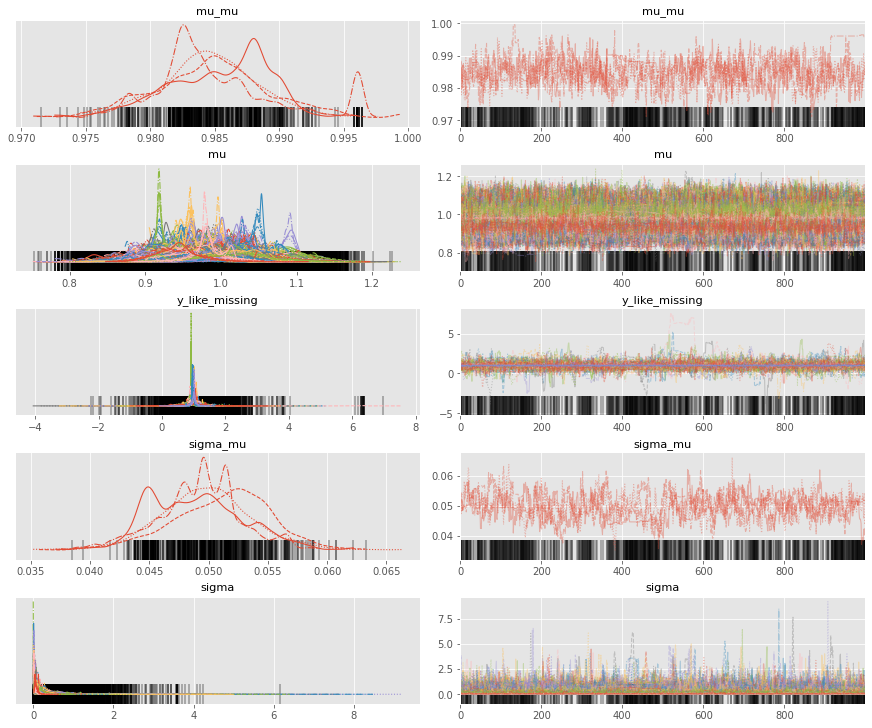

In [175]:
pm.traceplot(hierarchical_trace)

<ipython-input-197-bea842d6d01d>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(hierarchical_trace)
/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'mu_mu'}>,
        <AxesSubplot:title={'center':'mu_mu'}>],
       [<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'y_like_missing'}>,
        <AxesSubplot:title={'center':'y_like_missing'}>],
       [<AxesSubplot:title={'center':'sigma_mu'}>,
        <AxesSubplot:title={'center':'sigma_mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

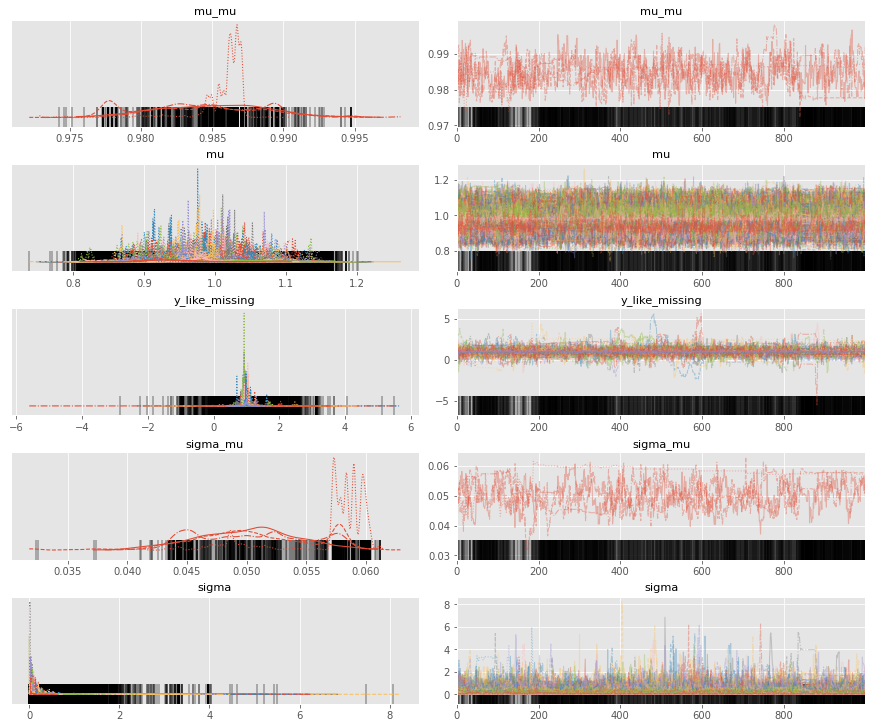

In [197]:
pm.traceplot(hierarchical_trace)

In [67]:
hierarchical_trace['mu'].shape

(4000, 491)

In [75]:
hierarchical_trace['mu'].shape

(4000, 491)

In [74]:
hierarchical_trace['mu']

array([[0.31344046, 0.44019773, 0.47683574, ..., 0.77623633, 0.62710173,
        0.51711677],
       [0.70872079, 0.4251618 , 0.55469253, ..., 0.63286389, 0.5954941 ,
        0.56497231],
       [0.66546887, 0.39467603, 0.5337304 , ..., 0.73641087, 0.60846766,
        0.48160787],
       ...,
       [0.30705489, 0.36521131, 0.50554595, ..., 0.67960578, 0.54630467,
        0.55893768],
       [0.29097392, 0.39448571, 0.53151585, ..., 0.69911945, 0.47097007,
        0.54397055],
       [0.56018689, 0.39544995, 0.63069765, ..., 0.77558723, 0.34577156,
        0.46741167]])

In [80]:
## just accessed the z_th of 4000 traces
hierarchical_trace['mu'][z]

array([0.54468162, 0.37486096, 0.47621376, 0.6124017 , 0.41576822,
       0.44291413, 0.50432104, 0.65905777, 0.56632284, 0.60135845,
       0.71119185, 0.42252329, 0.47490416, 0.48090378, 0.50073252,
       0.43680844, 0.4191377 , 0.44942057, 0.41984944, 0.55339833,
       0.51402489, 0.44765164, 0.56869207, 0.48320349, 0.58919705,
       0.28311111, 0.43561512, 0.73246742, 0.67118101, 0.45376336,
       0.54314248, 0.40642693, 0.45773629, 0.36560744, 0.47474255,
       0.46747256, 0.47412104, 0.41515326, 0.54851635, 0.30712204,
       0.58353565, 0.56077363, 0.49745334, 0.59853488, 0.48652474,
       0.49227794, 0.53125623, 0.49034747, 0.4331926 , 0.82917383,
       0.48815573, 0.54489236, 0.37903564, 0.53431579, 0.53688067,
       0.27933413, 0.4419262 , 0.56349126, 0.56164085, 0.57105386,
       0.33430982, 0.49294488, 0.39573579, 0.55367665, 0.68240173,
       0.36774251, 0.45321359, 0.57251424, 0.52416595, 0.63332474,
       0.4086763 , 0.42129998, 0.52807652, 0.22658574, 0.46238

In [119]:
# z_th entry from all 4000 traces
hierarchical_trace['mu'][:,z]

array([0.79326313, 0.79473136, 0.82605117, ..., 0.81561638, 0.81499246,
       0.80587846])

##### Case Studies

In [118]:
z = dd.loc[dd.zone_id == 1].zone_idx.unique()[0]
z

49

In [121]:
dd.loc[(dd.zone_id == 1)
       & (dd.holiday_name == 'Easter')].zone_level_holiday_factor

143912    0.822235
333322    0.795012
508304    0.829380
Name: zone_level_holiday_factor, dtype: float64

In [120]:
df.loc[(df.zone_id == 1)
       & (df.holiday_name == 'Easter')].zone_level_holiday_factor

143912    0.822235
333322    0.795012
508304    0.829380
683708    0.895054
Name: zone_level_holiday_factor, dtype: float64

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

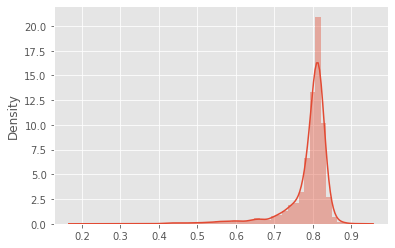

In [122]:
sns.distplot(hierarchical_trace['mu'][:,z])

In [123]:
hierarchical_trace['mu'][:,z].mean()

0.7878216370060256

In [125]:
z = dd.loc[dd.zone_id == 33].zone_idx.unique()[0]
z

231

In [126]:
dd.loc[(dd.zone_id == 33)
       & (dd.holiday_name == 'Easter')].zone_level_holiday_factor

144094    0.827801
333242    0.802089
508466    0.805509
Name: zone_level_holiday_factor, dtype: float64

In [127]:
df.loc[(df.zone_id == 33)
       & (df.holiday_name == 'Easter')].zone_level_holiday_factor

144094    0.827801
333242    0.802089
508466    0.805509
683771    0.817440
Name: zone_level_holiday_factor, dtype: float64

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

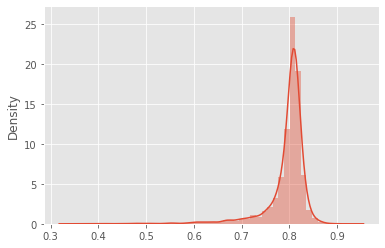

In [128]:
sns.distplot(hierarchical_trace['mu'][:,z])

In [129]:
hierarchical_trace['mu'][:,z].mean()

0.7948282137779118

In [85]:
within_zone_variation.head(2)

zone_id   std_dev       var
0        1  0.042424  0.001800
1       13  0.130083  0.016922

In [124]:
within_zone_variation.sort_values('std_dev').head(5)

zone_id   std_dev       var
8         33  0.011744  0.000138
430      841  0.011848  0.000140
214      431  0.017159  0.000294
226      445  0.019570  0.000383
4         18  0.019887  0.000395

In [86]:
within_zone_variation.sort_values('std_dev').tail(5)

zone_id   std_dev       var
378      704  0.411010  0.168929
469      988  0.451680  0.204015
108      267  0.512825  0.262989
435      854  0.640285  0.409965
436      856  0.780938  0.609864

In [109]:
z = dd.loc[dd.zone_id == 856].zone_idx.unique()[0]
z

457

In [110]:
dd.loc[(dd.zone_id == 856)
       & (dd.holiday_name == 'Easter')].zone_level_holiday_factor

144320    2.389994
332980    0.709942
508483    1.061390
Name: zone_level_holiday_factor, dtype: float64

In [111]:
df.loc[(df.zone_id == 856)
       & (df.holiday_name == 'Easter')].zone_level_holiday_factor

144320    2.389994
332980    0.709942
508483    1.061390
683693    0.799270
Name: zone_level_holiday_factor, dtype: float64

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

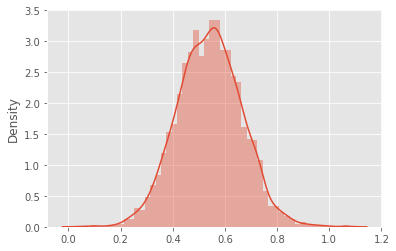

In [112]:
sns.distplot(hierarchical_trace['mu'][:,z])

In [113]:
z = dd.loc[dd.zone_id == 854].zone_idx.unique()[0]
z

384

In [114]:
dd.loc[(dd.zone_id == 854)
       & (dd.holiday_name == 'Easter')].zone_level_holiday_factor

144247    1.923392
333275    0.530750
508575    0.781352
Name: zone_level_holiday_factor, dtype: float64

In [115]:
df.loc[(df.zone_id == 854)
       & (df.holiday_name == 'Easter')].zone_level_holiday_factor

144247    1.923392
333275    0.530750
508575    0.781352
683789    0.665824
Name: zone_level_holiday_factor, dtype: float64

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

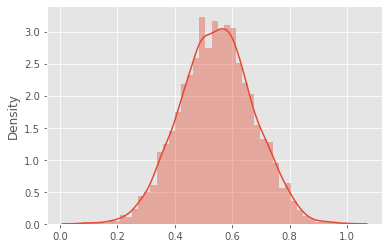

In [116]:
sns.distplot(hierarchical_trace['mu'][:,z])

##### WFV

In [279]:
df.tail(2)

zone_id        date  total_demand  t4w_total_demand  \
697709      178  2021-05-02   1581.899542     149451.792862   
697710      603  2021-05-02    359.100738      37315.282715   

        t4w_median_demand_same_dow  t4w_median_demand_same_dow_v2  \
697709                 1681.217186                    1681.217186   
697710                  374.762541                     374.762541   

        t7d_median_total_demand holiday_name  t7d_orders custom_holiday_name  \
697709              1238.645334          NaN        9945                 NaN   
697710               325.978169          NaN        2184                 NaN   

        ... total_demand_lag-21 total_demand_new  year natl_holiday_factor  \
697709  ...                 NaN      1581.899542  2021                 NaN   
697710  ...                 NaN       359.100738  2021                 NaN   

        zone_level_holiday_factor  error abs_error pct_error  abs_pct_error  \
697709                        1.0    NaN       NaN       NaN            NaN   
697710                        1.0    NaN       NaN       NaN            NaN   

        is_lag_holiday  
697709           False  
697710           False  

[2 rows x 37 columns]

In [280]:
zone_ids, zone_factor_estimates = [], []

for z_id in dd.zone_id.unique():
    z_idx = dd.loc[dd.zone_id == z_id].zone_idx.unique()[0]
    zone_factor_estimate = hierarchical_trace['mu'][:,z_idx].mean()
    
    zone_ids.append(z_id)
    zone_factor_estimates.append(zone_factor_estimate)
    
res = pd.DataFrame({'zone_id': zone_ids,
                    'zone_factor_estimate': zone_factor_estimates})

In [281]:
res.head(2)

zone_id  zone_factor_estimate
0      360              0.834596
1      274              0.833192

In [132]:
res.head(2)

zone_id  zone_factor_estimate
0      770              0.327220
1      159              0.504085

In [225]:
res.head(2)

zone_id  zone_factor_estimate
0      236              1.079012
1      145              1.154907

In [200]:
res.head(2)

zone_id  zone_factor_estimate
0      770              1.007378
1      159              0.979043

In [136]:
df.head(2)

zone_id        date  total_demand  t4w_total_demand  \
0      770  2017-06-12           0.0               0.0   
1      159  2017-06-12           0.0               0.0   

   t4w_median_demand_same_dow  t4w_median_demand_same_dow_v2  \
0                         0.0                            0.0   
1                         0.0                            0.0   

   t7d_median_total_demand holiday_name  t7d_orders custom_holiday_name  ...  \
0                      0.0          NaN        6021                 NaN  ...   
1                      0.0          NaN        8057                 NaN  ...   

  total_demand_lag21 total_demand_lag-21 total_demand_new  year  \
0                0.0            0.000000              0.0  2017   
1                0.0           70.883566              0.0  2017   

   natl_holiday_factor  zone_level_holiday_factor error abs_error  pct_error  \
0                  NaN                        NaN   NaN       NaN        NaN   
1                  NaN                        NaN   NaN       NaN        NaN   

   abs_pct_error  
0            NaN  
1            NaN  

[2 rows x 36 columns]

In [181]:
df.loc[(df.zone_id == 159)& (df.holiday_name == 'Super Bowl')][['year', 'zone_level_holiday_factor', 'natl_holiday_factor', 'error', 'abs_error', 'pct_error', 'abs_pct_error']]

year  zone_level_holiday_factor  natl_holiday_factor     error  \
116653  2018                   0.978661                  NaN       NaN   
295371  2019                   1.018908             0.963613 -0.055295   
474164  2020                   0.916495             0.947876  0.031380   
656109  2021                   1.013272             0.947876 -0.065397   

        abs_error  pct_error  abs_pct_error  
116653        NaN        NaN            NaN  
295371   0.055295  -2.738863       2.738863  
474164   0.031380   1.637379       1.637379  
656109   0.065397  -3.248282       3.248282

In [295]:
fin = df.loc[
#              (df.year == 2021) & (df.holiday_name == 'Easter')
#              (df.year == 2021) & (df.holiday_name == 'Super Bowl')
#              (df.year == 2020) & (df.holiday_name == 'Labor Day')
#              (df.year == 2021) & (df.holiday_name == "New Year's Day")
             (df.year == 2020) & (df.holiday_name == 'Thanksgiving_lag2')
            ].merge(res, how='left', on='zone_id')

In [296]:
fin.shape

(452, 38)

In [203]:
fin.loc[(fin.zone_id.isin([159, 856, 1, 13, 861, 972, 979, 18]))& (fin.holiday_name == 'Super Bowl')][['year', 'holiday_name', 'zone_id', 'zone_level_holiday_factor', 'zone_factor_estimate', 'natl_holiday_factor', 'error', 'abs_error', 'pct_error', 'abs_pct_error']]

year holiday_name  zone_id  zone_level_holiday_factor  \
21   2021   Super Bowl        1                   0.949155   
133  2021   Super Bowl      159                   1.013272   
221  2021   Super Bowl      972                   0.961506   
260  2021   Super Bowl      861                   0.705919   
267  2021   Super Bowl      979                   0.959392   
345  2021   Super Bowl       18                   0.734959   
380  2021   Super Bowl       13                   0.678034   
428  2021   Super Bowl      856                   1.359933   

     zone_factor_estimate  natl_holiday_factor     error  abs_error  \
21               0.957444             0.947876 -0.001279   0.001279   
133              0.979043             0.947876 -0.065397   0.065397   
221              0.945722             0.947876 -0.013631   0.013631   
260              0.987670             0.947876  0.241957   0.241957   
267              0.966287             0.947876 -0.011517   0.011517   
345              0.978375             0.947876  0.212916   0.212916   
380              0.956140             0.947876  0.269842   0.269842   
428              1.018080             0.947876 -0.412057   0.412057   

     pct_error  abs_pct_error  
21   -0.065631       0.065631  
133  -3.248282       3.248282  
221  -0.694907       0.694907  
260  14.183383      14.183383  
267  -0.587762       0.587762  
345  12.272127      12.272127  
380  16.080825      16.080825  
428 -17.460543      17.460543

In [301]:
dd.year.unique()

array([2017, 2018, 2019])

In [297]:
naive_zone_factor_estimates = dd.groupby('zone_id').zone_level_holiday_factor.mean().reset_index(name='naive_zone_factor_estimate')
naive_zone_factor_estimates.head(2)

fin = fin.merge(naive_zone_factor_estimates, how='left', on='zone_id')

In [298]:
fin['error_old'] = fin.natl_holiday_factor - fin.zone_level_holiday_factor
fin['abs_error_old'] = fin.error.abs()

fin['error_naive'] = fin.naive_zone_factor_estimate - fin.zone_level_holiday_factor
fin['abs_error_naive'] = fin.error_naive.abs()

fin['error_new'] = fin.zone_factor_estimate - fin.zone_level_holiday_factor
fin['abs_error_new'] = fin.error_new.abs()

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

Text(0.5, 0, 'error')

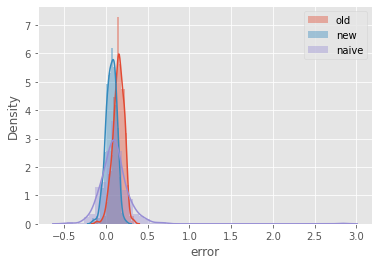

In [299]:
ax = sns.distplot(fin.error_old, label='old')
sns.distplot(fin.error_new, label='new', ax=ax)
sns.distplot(fin.error_naive, label='naive', ax=ax)

ax.legend(loc='best')
ax.set_xlabel('error')

In [300]:
# Txsgiving lag2
fin[['abs_error_old', 'abs_error_naive', 'abs_error_new']].describe()

abs_error_old  abs_error_naive  abs_error_new
count     452.000000       452.000000     452.000000
mean        0.149844         0.143045       0.073804
std         0.063599         0.169385       0.048551
min         0.000275         0.000231       0.000175
25%         0.106818         0.059354       0.034263
50%         0.151064         0.112763       0.069190
75%         0.196771         0.182014       0.108962
max         0.338553         2.836837       0.245870

In [208]:
fin[['abs_error_old', 'abs_error_naive', 'abs_error_new']].describe()

abs_error_old  abs_error_naive  abs_error_new
count     491.000000       491.000000     491.000000
mean        0.116774         0.139335       0.112048
std         0.118922         0.136578       0.127323
min         0.000495         0.000003       0.000153
25%         0.034033         0.042491       0.026965
50%         0.075403         0.095499       0.062294
75%         0.163282         0.197573       0.138813
max         0.523733         1.057656       0.573886

In [ ]:
# [X] naive zone avg
# [] try no 2020
# [/] other holidays
# store hr feats

In [ ]:
# for seasonality: if want to do bayesian, would have to code up HW or FB prophet or such
    # kind of involved but could be good to do that